# Simulated Annealing 
## - A primer in metaheuristics

By Hans Martin Aannestad

(Thanks for the motivation Johnnyboycurtis)

Anneal new candidate $x' = x + \zeta \ $ 

We use acceptance probability $ p $ s.t.

\begin{equation}

    P(x') = e^{\frac{\Delta h}{T_i}}

\end{equation}

where $ \Delta h = h(x') - h(x) $, updating $ T_{i+1} = \alpha T_{i} $ where $ 0 < \alpha < 1 $ 

Accept: $x = x'$ if $ P(x') \geq u \sim U(0,1) $


In [59]:
# Define a chaotic oscillating function hard to optimize

def fun(x):
    for i in range(3):
        x = 0.3*np.sin(2.71*x*(1-x))
    return x + np.cos(60*x) + np.sin(10*x)


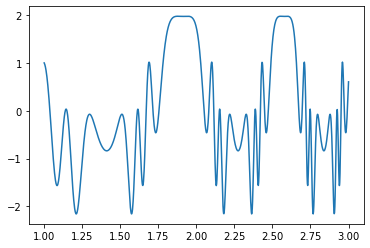

In [205]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,3,1000)

plt.plot(x,fun(x))
plt.show()

In [234]:
# Demonstrate that simple greedy search get stuck in local optimum

def greedy_ascend(f,x0,alpha,tol,n_steps):
    x = x0
    i = 0
    path = [0,x]
    while (i <= n_steps) and (abs(f(path[-1]) - f(path[-2])) >= tol):
        if f(x+alpha) > f(x-alpha):
            x += alpha
        else:
            x -= alpha

        path.append(x)
        i += 1    
        
    return np.array(path[1:])

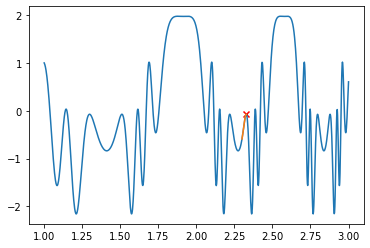

In [265]:
np.random.seed(369)

start=np.random.uniform(1,3)

pts = greedy_ascend(fun,start,0.001,0.001,1000)

plt.plot(x,fun(x))
plt.scatter(pts[-2],fun(pts[-2]),marker='x',color='red')
plt.plot(pts,fun(pts))
plt.show()

Greedy search get stuck locally...

In [336]:
# Simulated annealing to the rescue

def simulated_annealing(f,x0,min,max,beta,t,t_cold):
    x = x0
    path = [0,x]
    scale = np.sqrt(t)

    while t > t_cold: #  and (abs(f(path[-1]) - f(path[-2])) >= tol):
        # get random neighbor
        x_new = x + scale*np.random.normal()
        F = f(x)
        if x_new > min and x_new < max:  # valid range
            if f(x_new) > F:     # improvement: accept new best
                x = x_new
                F = f(x_new)
            else:
                delta = f(x_new) - F
                p = np.exp(delta/t)

                # Accept new position if delta is probable given heat
                if p > np.random.uniform(0,1):
                    x = x_new
                    F = f(x_new)

            path.append(x)
            t = t*beta

    return np.array(path[1:])

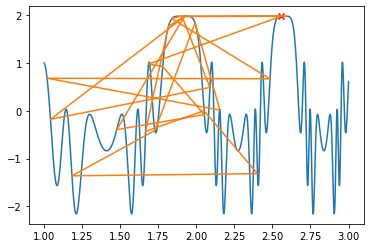

In [355]:
start=np.random.uniform(1,3)

pts2 = simulated_annealing(fun,start,1,3,0.9,10,1e-45)

plt.plot(x,fun(x))
plt.scatter(pts2[-1],fun(pts2[-1]),marker='x',color='red')
plt.plot(pts2,fun(pts2))
plt.show()

# Anneal, it Works!